In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import math
import statsmodels.formula.api as smf

In [2]:
df01=pd.read_excel('wenke1ben.xls')

In [3]:
df01

,year,hubei,henan,shanxi,jiangxi,hunan,anhui
0,2020,531,556,542,547,550,541
1,2019,542,536,545,558,553,550
2,2018,561,547,546,568,569,550
3,2017,528,516,518,533,548,515
4,2016,520,517,518,523,530,521
5,2015,521,513,513,528,535,597
6,2014,535,536,526,524,562,541
7,2013,531,519,507,532,557,540
8,2012,561,557,539,570,571,577
9,2011,547,562,543,532,583,547


In [4]:
df010 = df01.drop(index = 0)
df011 = df01[0:1]

# 多元线性回归

In [5]:
y01=df010.hubei

In [6]:
X01=df010[['year','henan','shanxi','jiangxi','hunan','anhui']]                         
X01=sm.add_constant(X01)

In [7]:
est=sm.OLS(y01,X01).fit()

In [8]:
est.summary()

C:\Users\dyw2000\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hubei   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     41.49
Date:                Thu, 10 Dec 2020   Prob (F-statistic):            0.00560
Time:                        13:48:40   Log-Likelihood:                -18.500
No. Observations:                  10   AIC:                             51.00
Df Residuals:                       3   BIC:                             53.12
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2038.0687   1807.888     -1.127      0.342   -7791.575    3715.438
year           1.0270      0.891      1.152      0.333      -1.809       3.864
henan          0.5088      0.178      2.857      0.065      -0.058       1.076
shanxi        -0.3147      0.195     -1.613      0.205      -0.935       0.306
jiangxi        0.4259      0.099      4.310      0.023       0.111       0.740
hunan          0.3024      0.130      2.334      0.102      -0.110       0.715
anhui          0.0059      0.052      0.113      0.917      -0.160       0.172
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   2.814
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.109
Skew:                          -0.002   Prob(JB):                        0.947
Kurtosis:                       2.489   Cond. No.                     4.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 方差膨胀系数计算

In [9]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X01.iloc[:,1:].columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X01.iloc[:,1:].values, i) 
                          for i in range(len(X01.iloc[:,1:].columns))] 
  
print(vif_data)

   feature          VIF
0     year  2130.103148
1    henan  6913.969172
2   shanxi  6314.473694
3  jiangxi  1802.687535
4    hunan  3934.415249
5    anhui   560.935638


# 回归诊断

   hubei    resids  std_resids      fitted
1    542 -2.831937   -1.007994  544.831937
2    561  2.815465    1.002131  558.184535
3    528 -0.730754   -0.260103  528.730754
4    520  1.454399    0.517676  518.545601
5    521 -0.146365   -0.052097  521.146365


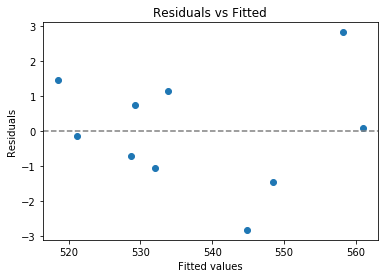

In [10]:
lm = smf.ols(formula = 'y01 ~ X01', data = df010).fit()
results = pd.DataFrame({'hubei': y01, # y实际值
                        'resids': lm.resid, # 残差
                        'std_resids': lm.resid_pearson, # 方差标准化的残差
                        'fitted': lm.predict() # y预测值
                       })
print(results.head())

# 残差拟合图：横坐标是拟合值，纵坐标是残差。
residsvfitted = plt.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed') # 绘制y=0水平线
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show(residsvfitted)


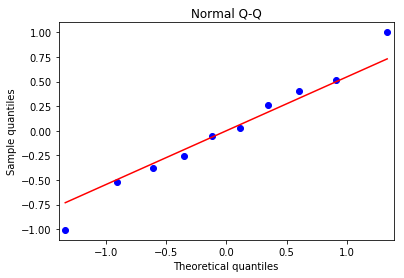

In [11]:
# 残差QQ图：用来描述残差是否符合正态分布。
qqplot = sm.qqplot(results['std_resids'], line='s')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Sample quantiles')
plt.title('Normal Q-Q')
plt.show(qqplot)